In [ ]:
!pip install -q google-cloud-storage

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install samtools
!sudo apt-get install bwa
!sudo apt-get update
!sudo apt-get install openjdk-17-jdk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 libhtscodecs2 samtools
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 963 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 963 kB in 0s (2,175 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed,

In [ ]:
!chmod +x /content/drive/MyDrive/GenomeAnalysis/tools/samtools-1.18/samtools

In [ ]:
import os
os.environ['DATA'] = "/content/drive/MyDrive/GenomeAnalysis/data"
os.environ['TOOLS'] = "/content/drive/MyDrive/GenomeAnalysis/tools"

In [ ]:
!gsutil ls gs://gatk-tutorials/workshop_2002/2-germline/

gs://gatk-tutorials/workshop_2002/2-germline/trio.ped
gs://gatk-tutorials/workshop_2002/2-germline/CNNScoreVariants/
gs://gatk-tutorials/workshop_2002/2-germline/bams/
gs://gatk-tutorials/workshop_2002/2-germline/gvcfs/
gs://gatk-tutorials/workshop_2002/2-germline/illumina_platinum/
gs://gatk-tutorials/workshop_2002/2-germline/intervals/
gs://gatk-tutorials/workshop_2002/2-germline/ref/
gs://gatk-tutorials/workshop_2002/2-germline/resources/


In [ ]:
!gsutil ls gs://gatk-test-data/wgs_fastq/NA12878_20k/H06HDADXX130110.1.ATCACGAT.20k_reads_1.fastq

gs://gatk-test-data/wgs_fastq/NA12878_20k/H06HDADXX130110.1.ATCACGAT.20k_reads_1.fastq


In [ ]:
!gsutil cp gs://gatk-tutorials/workshop_2002/2-germline/trio.ped ${DATA}/resources
!gsutil cp gs://gatk-tutorials/workshop_2002/2-germline/resources/* ${DATA}/resources
!gsutil cp gs://gatk-tutorials/workshop_2002/2-germline/bams/* ${DATA}/bams

Copying gs://gatk-tutorials/workshop_2002/2-germline/trio.ped...
/ [1 files][  181.0 B/  181.0 B]                                                
Operation completed over 1 objects/181.0 B.                                      
Copying gs://gatk-tutorials/workshop_2002/2-germline/resources/af-only-gnomad.chr20subset.b37.vcf.gz...
Copying gs://gatk-tutorials/workshop_2002/2-germline/resources/af-only-gnomad.chr20subset.b37.vcf.gz.tbi...
Copying gs://gatk-tutorials/workshop_2002/2-germline/resources/dbsnp.vcf...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

Copying gs://gatk-tutorials/workshop_2002/2-germline/resources/dbsnp.vcf.idx...
/ [4 files][230.4 MiB/230.4 MiB]   24.8 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run sign

In [ ]:
!export OutputFolder=${DATA}/variant-discovery

In [ ]:
!${TOOLS}/samtools-1.18/samtools view ${DATA}/bams/mother.bam | head -n 5

H0164ALXX140820:2:1108:8135:38509	99	20	9999879	60	118M2I31M	=	10000037	296	CCCATTAGATGGTCTTGAAACGTTGTTAAAATTCAACTGACCATAGGTGTATTGGTTTATTTCTGTACTCTTAGTAGATTCCATTGACCTATATCTCTATCCTTATGCCAGTACCACACTGTTTTGTTTACTACAGCTTTGTAGTAAATTT	===>?<?>=><>>>?=>>>=>8>=>>==><=>==>==>====;=>>>9>>?>;>>>====<<=>==?>?=><==>?>=><=<>=<>>>>@?><=>>>?@?=?@>@??@?@:?@<?@?@?<>??<?9@>?A@AA@<AAB;?;AB@<A<=<:;	MC:Z:13S138M	MD:Z:149	PG:Z:MarkDuplicates	RG:Z:H0164.2	NM:i:2	MQ:i:60	OQ:Z:FFFFFAJFAJFFJJJFJJJFJJJJJJJFJFJJJJJJJJJJJJFJJJJAJJJJFJJJJJFJJJJJJJJJJJJJFFJJJFJJJJJJJJJJJJJJFFJJJJJJFJJJJJJJJJAJJFJJJJJAFJJFJAJFJJJJJJAJJJAFAJJFAJAJJJJ	UQ:i:0	AS:i:141
H0164ALXX140820:2:1108:8247:38350	1123	20	9999879	60	118M2I31M	=	10000037	296	CCCATTAGATGGTCTTGAAACGTTGTTAAAATTCAACTGACCATAGGTGTATTGGTTTATTTCTGTACTCTTAGTAGATTCCATTGACCTATATCTCTATCCTTATGCCAGTACCACACTGTTTTGTTTACTACAGCTTTGTAGTAAATTT	===>?>??>><>>>@=>>>>>6>=>>=?>==>==>==<====;=>><>>>?>=>>===?=<<=>==?>?=><=?>?>>><=<;=<;>>>?<>?>>>>?:???@>@??@?@@<@????@?@?:?<>>>??;=A?@?AA=?@AABBA=/

In [ ]:
!echo "Statistics"
!samtools view ${DATA}/bams/mother.bam | cut -f 3 | sort | uniq -c | sort -nr | sed -e 's/^ *//;s/ /\t/' | awk 'OFS="\t" {print $2,$1}' | sort -n -k1,1

Statistics
20	133237


In [ ]:
#Xác định độ phủ (depth/coverage)
!${TOOLS}/samtools-1.18/samtools depth ${DATA}/bams/mother.bam > ${DATA}/bams/mother.depth.txt

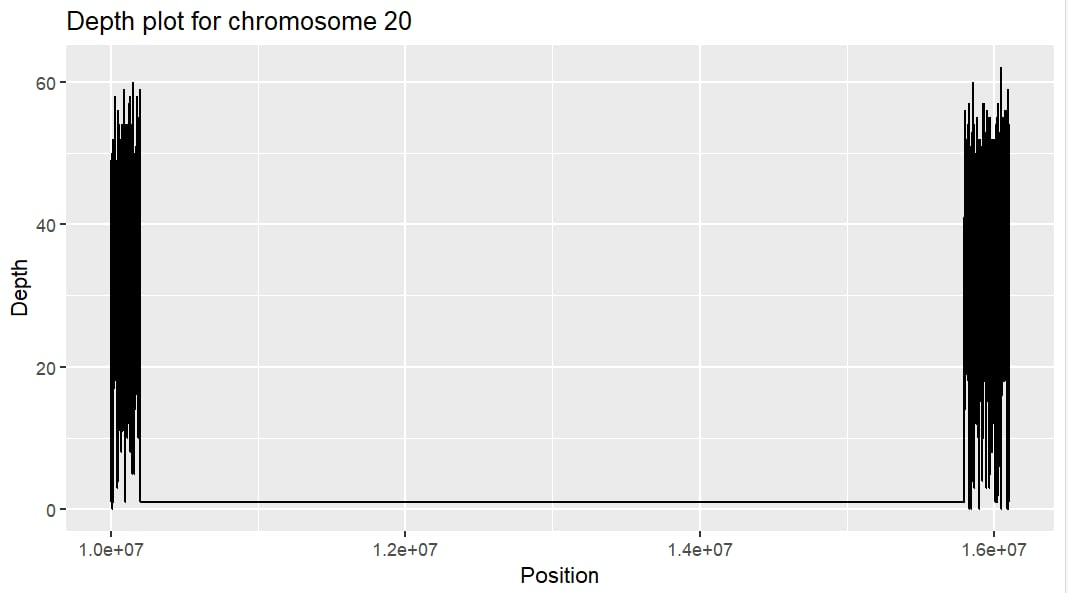

In [ ]:
!echo "Statistics"
!samtools view ${DATA}/bams/father.bam | cut -f 3 | sort | uniq -c | sort -nr | sed -e 's/^ *//;s/ /\t/' | awk 'OFS="\t" {print $2,$1}' | sort -n -k1,1

Statistics
20	53803


In [ ]:
!echo "Statistics"
!samtools view ${DATA}/bams/son.bam | cut -f 3 | sort | uniq -c | sort -nr | sed -e 's/^ *//;s/ /\t/' | awk 'OFS="\t" {print $2,$1}' | sort -n -k1,1

Statistics
20	54214


# **Single sample mode**

In [ ]:
os.environ['GATK'] = "/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar"

In [ ]:
!java -jar $GATK HaplotypeCaller\
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-I ${DATA}/bams/mother.bam \
-L 20:10,000,000-10,200,000 \
-O ${DATA}/variant-discovery/motherHC.vcf

08:17:52.124 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
08:17:52.338 INFO  HaplotypeCaller - ------------------------------------------------------------
08:17:52.339 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.2.0.0
08:17:52.339 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
08:17:52.339 INFO  HaplotypeCaller - Executing as root@f6921e6d410d on Linux v6.1.85+ amd64
08:17:52.339 INFO  HaplotypeCaller - Java runtime: OpenJDK 64-Bit Server VM v17.0.13+11-Ubuntu-2ubuntu122.04
08:17:52.340 INFO  HaplotypeCaller - Start Date/Time: November 21, 2024 at 8:17:52 AM UTC
08:17:52.340 INFO  HaplotypeCaller - ------------------------------------------------------------
08:17:52.340 INFO  HaplotypeCaller - ------------------------------------------------------------
08

In [ ]:
!cat ${DATA}/variant-discovery/motherHC.vcf |grep -v "##"|head -n 10

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NA12878
20	10000117	.	C	T	283.64	.	AC=1;AF=0.500;AN=2;BaseQRankSum=-0.779;DP=23;ExcessHet=3.0103;FS=0.000;MLEAC=1;MLEAF=0.500;MQ=60.47;MQRankSum=1.044;QD=12.33;ReadPosRankSum=0.154;SOR=0.446	GT:AD:DP:GQ:PL	0/1:11,12:23:99:291,0,292
20	10000211	.	C	T	347.64	.	AC=1;AF=0.500;AN=2;BaseQRankSum=2.627;DP=35;ExcessHet=3.0103;FS=1.313;MLEAC=1;MLEAF=0.500;MQ=60.00;MQRankSum=0.000;QD=9.93;ReadPosRankSum=-0.421;SOR=0.465	GT:AD:DP:GQ:PL	0/1:21,14:35:99:355,0,526
20	10000439	.	T	G	781.06	.	AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0.000;MLEAC=2;MLEAF=1.00;MQ=60.00;QD=26.93;SOR=1.255	GT:AD:DP:GQ:PL	1/1:0,29:29:86:795,86,0
20	10000598	.	T	A	984.06	.	AC=2;AF=1.00;AN=2;DP=30;ExcessHet=3.0103;FS=0.000;MLEAC=2;MLEAF=1.00;MQ=60.00;QD=32.80;SOR=0.976	GT:AD:DP:GQ:PL	1/1:0,30:30:90:998,90,0
20	10000694	.	G	A	563.64	.	AC=1;AF=0.500;AN=2;BaseQRankSum=1.399;DP=39;ExcessHet=3.0103;FS=2.961;MLEAC=1;MLEAF=0.500;MQ=59.25;MQRankSum=-1.252;QD=14.83;ReadPosRankSum=0.118;

Hiển thị realigned reads và assembled haplotypes

In [ ]:
!java -jar $GATK HaplotypeCaller \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-I ${DATA}/bams/mother.bam \
-O ${DATA}/variant-discovery/motherHCdebug.vcf \
-bamout ${DATA}/variant-discovery/motherHCdebug.bam \
-L 20:10,000,000-10,200,000

08:18:46.010 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
08:18:46.256 INFO  HaplotypeCaller - ------------------------------------------------------------
08:18:46.257 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.2.0.0
08:18:46.257 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
08:18:46.257 INFO  HaplotypeCaller - Executing as root@f6921e6d410d on Linux v6.1.85+ amd64
08:18:46.257 INFO  HaplotypeCaller - Java runtime: OpenJDK 64-Bit Server VM v17.0.13+11-Ubuntu-2ubuntu122.04
08:18:46.257 INFO  HaplotypeCaller - Start Date/Time: November 21, 2024 at 8:18:45 AM UTC
08:18:46.257 INFO  HaplotypeCaller - ------------------------------------------------------------
08:18:46.257 INFO  HaplotypeCaller - ------------------------------------------------------------
08

In [ ]:
!apt-get update
!apt-get install -y tabix

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!which bgzip
!which tabix

/usr/bin/bgzip
/usr/bin/tabix


In [ ]:
!bgzip ${DATA}/variant-discovery/motherHCdebug.vcf
!tabix -p vcf ${DATA}/variant-discovery/motherHCdebug.vcf.gz

[bgzip] /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/motherHCdebug.vcf.gz already exists; do you wish to overwrite (y or n)? ^C
[tabix] the index file exists. Please use '-f' to overwrite.


In [ ]:
!chmod +x /content/drive/MyDrive/GenomeAnalysis/tools/bcftools-1.21/bcftools

In [ ]:
#Compile
%cd /content/drive/MyDrive/GenomeAnalysis/tools/bcftools-1.21/
!./configure
!make
!make install

/content/drive/MyDrive/GenomeAnalysis/tools/bcftools-1.21
/bin/bash: ./configure: /bin/sh: bad interpreter: Permission denied
cd htslib-1.21 && make htslib.pc.tmp
make[1]: Entering directory '/content/drive/MyDrive/GenomeAnalysis/tools/bcftools-1.21/htslib-1.21'
make[1]: ./version.sh: Permission denied
echo '# Default htscodecs.mk generated by Makefile' > htscodecs.mk
echo 'include $(HTSPREFIX)htscodecs_bundled.mk' >> htscodecs.mk
./hts_probe_cc.sh 'gcc' '-g -Wall -O2 -fvisibility=hidden ' '-fvisibility=hidden' >> htscodecs.mk
/bin/sh: 1: ./hts_probe_cc.sh: Permission denied
Makefile:149: htscodecs.mk: No such file or directory
make[1]: *** [Makefile:132: htscodecs.mk] Error 126
make[1]: Leaving directory '/content/drive/MyDrive/GenomeAnalysis/tools/bcftools-1.21/htslib-1.21'
config.mk:34: htslib-1.21/htslib_static.mk: No such file or directory
make: *** [htslib-1.21/htslib.mk:186: htslib-1.21/htslib.pc.tmp] Error 2
cd htslib-1.21 && make htslib.pc.tmp
make[1]: Entering directory '/con

In [ ]:
!${TOOLS}/bcftools-1.21/bcftools view \
-R ${DATA}/variant-discovery/variants.txt \
${DATA}/variant-discovery/motherHCdebug.vcf.gz \
> ${DATA}/variant-discovery/motherHCdebug_extracted.vcf

In [ ]:
!${TOOLS}/bcftools-1.21/bcftools view \
-R ${DATA}/variant-discovery/variants_woREF_ALT.txt \
${DATA}/variant-discovery/motherHCdebug.vcf.gz \
> ${DATA}/variant-discovery/motherHCdebug_extracted.vcf

**Cohort mode (Áp dụng với bộ ba (trio) mother-father-son)**

In [ ]:
!chmod +x /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk HaplotypeCaller \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-I ${DATA}/bams/mother.bam \
-ERC GVCF \
-L 20:10,000,000-10,200,000 \
-O ${DATA}/variant-discovery/mother.g.vcf

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar HaplotypeCaller -R /content/drive/MyDrive/GenomeAnalysis/data/ref/Homo_sapiens_assembly19.fasta -I /content/drive/MyDrive/GenomeAnalysis/data/bams/mother.bam -ERC GVCF -L 20:10,000,000-10,200,000 -O /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/mother.g.vcf
09:17:32.616 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:17:32.882 INFO  HaplotypeCaller - ------------------------------------------------------------
09:17:32.882 INFO  HaplotypeCaller - The Ge

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk HaplotypeCaller \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-I ${DATA}/bams/father.bam \
-ERC GVCF \
-L 20:10,000,000-10,200,000 \
-O ${DATA}/variant-discovery/father.g.vcf \

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar HaplotypeCaller -R /content/drive/MyDrive/GenomeAnalysis/data/ref/Homo_sapiens_assembly19.fasta -I /content/drive/MyDrive/GenomeAnalysis/data/bams/father.bam -ERC GVCF -L 20:10,000,000-10,200,000 -O /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/father.g.vcf \
USAGE: HaplotypeCaller [arguments]

Call germline SNPs and indels via local re-assembly of haplotypes
Version:4.2.0.0


Required Arguments:

--input,-I <GATKPath>         BAM/SAM/CRAM file containing reads  This argument must be specified at least once.
                              Required. 

--output,-O <GATKPath>        File to which variants should 

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk HaplotypeCaller \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-I ${DATA}/bams/son.bam \
-ERC GVCF \
-L 20:10,000,000-10,200,000 \
-O ${DATA}/variant-discovery/son.g.vcf

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar HaplotypeCaller -R /content/drive/MyDrive/GenomeAnalysis/data/ref/Homo_sapiens_assembly19.fasta -I /content/drive/MyDrive/GenomeAnalysis/data/bams/son.bam -ERC GVCF -L 20:10,000,000-10,200,000 -O /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/son.g.vcf
09:19:48.917 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:19:49.160 INFO  HaplotypeCaller - ------------------------------------------------------------
09:19:49.160 INFO  HaplotypeCaller - The Genome A

In [ ]:
!cat ${DATA}/variant-discovery/mother.g.vcf |grep -v "##" |head -n 10

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NA12878
20	10000000	.	T	<NON_REF>	.	.	END=10000008	GT:DP:GQ:MIN_DP:PL	0/0:16:48:16:0,48,497
20	10000009	.	A	<NON_REF>	.	.	END=10000009	GT:DP:GQ:MIN_DP:PL	0/0:16:32:16:0,32,485
20	10000010	.	C	<NON_REF>	.	.	END=10000017	GT:DP:GQ:MIN_DP:PL	0/0:16:48:16:0,48,472
20	10000018	.	T	<NON_REF>	.	.	END=10000022	GT:DP:GQ:MIN_DP:PL	0/0:16:45:16:0,45,675
20	10000023	.	A	<NON_REF>	.	.	END=10000026	GT:DP:GQ:MIN_DP:PL	0/0:17:48:17:0,48,720
20	10000027	.	T	<NON_REF>	.	.	END=10000027	GT:DP:GQ:MIN_DP:PL	0/0:18:51:18:0,51,765
20	10000028	.	T	<NON_REF>	.	.	END=10000031	GT:DP:GQ:MIN_DP:PL	0/0:17:48:17:0,48,720
20	10000032	.	C	<NON_REF>	.	.	END=10000032	GT:DP:GQ:MIN_DP:PL	0/0:17:34:17:0,34,448
20	10000033	.	T	<NON_REF>	.	.	END=10000034	GT:DP:GQ:MIN_DP:PL	0/0:17:48:17:0,48,720


**Sử dụng GenomicsDBImport để lưu dần các file g.vcf (Consolidate GVCFs)**

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk GenomicsDBImport \
-V ${DATA}/variant-discovery/mother.g.vcf \
-V ${DATA}/variant-discovery/father.g.vcf \
--genomicsdb-workspace-path ${DATA}/variant-discovery/trio \
--intervals 20:10,000,000-10,200,000

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar GenomicsDBImport -V /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/mother.g.vcf -V /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/father.g.vcf --genomicsdb-workspace-path /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/trio --intervals 20:10,000,000-10,200,000
09:21:56.020 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:21:56.390 INFO  GenomicsDBImport - ------------------------------------------------------------
09:21:56.391 

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk GenomicsDBImport \
-V ${DATA}/variant-discovery/son.g.vcf \
--genomicsdb-update-workspace-path ${DATA}/variant-discovery/trio \
--intervals 20:10,000,000-10,200,000

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar GenomicsDBImport -V /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/son.g.vcf --genomicsdb-update-workspace-path /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/trio --intervals 20:10,000,000-10,200,000
09:22:34.057 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:22:34.364 INFO  GenomicsDBImport - ------------------------------------------------------------
09:22:34.366 INFO  GenomicsDBImport - The Genome Analysis Toolkit (GATK) v4.2.0.0
09:2

In [ ]:
!ln -s ${DATA}/variant-discovery variant-discovery

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk SelectVariants \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-V gendb://variant-discovery/trio \
-O ${DATA}/variant-discovery/trio_selectvariants.g.vcf

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar SelectVariants -R /content/drive/MyDrive/GenomeAnalysis/data/ref/Homo_sapiens_assembly19.fasta -V gendb://variant-discovery/trio -O /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/trio_selectvariants.g.vcf
09:24:04.378 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:24:04.727 INFO  SelectVariants - ------------------------------------------------------------
09:24:04.728 INFO  SelectVariants - The Genome Analysis Toolkit (GATK) v4.2.0.0
09:24:04.728 INFO 

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk GenotypeGVCFs \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-V gendb://variant-discovery/trio \
-O ${DATA}/variant-discovery/trioGGVCF.vcf \
-L 20:10,000,000-10,200,000

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar GenotypeGVCFs -R /content/drive/MyDrive/GenomeAnalysis/data/ref/Homo_sapiens_assembly19.fasta -V gendb://variant-discovery/trio -O /content/drive/MyDrive/GenomeAnalysis/data/variant-discovery/trioGGVCF.vcf -L 20:10,000,000-10,200,000
09:24:56.669 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:24:57.111 INFO  GenotypeGVCFs - ------------------------------------------------------------
09:24:57.112 INFO  GenotypeGVCFs - The Genome Analysis Toolkit (GATK) v4.2.0.0
09:24

In [ ]:
!${TOOLS}/gatk-4.2.0.0/gatk HaplotypeCaller \
-R ${DATA}/ref/Homo_sapiens_assembly19.fasta \
-I ${DATA}/bams/mother.bam \
-I ${DATA}/bams/father.bam \
-I ${DATA}/bams/son.bam \
-O variant-discovery/trio_hcjoint_nq.vcf \
-L 20:10,000,000-10,200,000 \
-new-qual \
-bamout variant-discovery/trio_hcjoint_nq.bam

Using GATK jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar HaplotypeCaller -R /content/drive/MyDrive/GenomeAnalysis/data/ref/Homo_sapiens_assembly19.fasta -I /content/drive/MyDrive/GenomeAnalysis/data/bams/mother.bam -I /content/drive/MyDrive/GenomeAnalysis/data/bams/father.bam -I /content/drive/MyDrive/GenomeAnalysis/data/bams/son.bam -O variant-discovery/trio_hcjoint_nq.vcf -L 20:10,000,000-10,200,000 -new-qual -bamout variant-discovery/trio_hcjoint_nq.bam
09:39:03.824 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/GenomeAnalysis/tools/gatk-4.2.0.0/gatk-package-4.2.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:39:04.0